<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-Study-6:-Social-Network-Analysis" data-toc-modified-id="Case-Study-6:-Social-Network-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case Study 6: Social Network Analysis</a></span><ul class="toc-item"><li><span><a href="#Introduction-to-Network-Analysis" data-toc-modified-id="Introduction-to-Network-Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction to Network Analysis</a></span></li><li><span><a href="#Basics-of-NetworkX" data-toc-modified-id="Basics-of-NetworkX-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Basics of NetworkX</a></span></li><li><span><a href="#Graph-Visualization" data-toc-modified-id="Graph-Visualization-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Graph Visualization</a></span></li><li><span><a href="#Random-Graphs" data-toc-modified-id="Random-Graphs-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Random Graphs</a></span></li><li><span><a href="#Plotting-the-Degree-Distribution" data-toc-modified-id="Plotting-the-Degree-Distribution-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Plotting the Degree Distribution</a></span></li><li><span><a href="#Descriptive-Statistics-of-Empirical-Social-Networks" data-toc-modified-id="Descriptive-Statistics-of-Empirical-Social-Networks-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Descriptive Statistics of Empirical Social Networks</a></span></li><li><span><a href="#Finding-the-Largest-Connected-Component" data-toc-modified-id="Finding-the-Largest-Connected-Component-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Finding the Largest Connected Component</a></span></li></ul></li></ul></div>

## Case Study 6: Social Network Analysis

### Introduction to Network Analysis

Many systems of scientific and societal interest consist of a large number of interacting components.

The structure of these systems can be represented as networks where network nodes represent the components, and network edges, the interactions between the components.

Network analysis can be used to study how pathogens, behaviors, and information spread in social networks, having important implications for our understanding of epidemics and the planning of effective interventions.

In a biological context, at a molecular level, network analysis can be applied to gene regulation networks, signal transduction networks, protein interaction networks, and much, much more.

Network refers to the real world object, such as a road network, whereas a graph refers to its abstract mathematical representation.

### Basics of NetworkX

Networks are created and manipulated using the NetworkX module.

create an instance of an undirected graph using that Graph function.

We can now add nodes one at a time or several at a time.

One important point to realize is that the node labels don't necessarily have to be numbers.



In [963]:
import networkx as nx

G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_nodes_from(["u", "v"])

If we would like to know what are the nodes in our graph, we can use the nodes method.

In [964]:
G.nodes()

NodeView((1, 2, 3, 'u', 'v'))

Similar functions exist also for adding edges.

Remember that edges are treated as pairs of nodes.

Let's first try adding just one edge.

We can also add multiple edges at the same time.

We can add an edge even if the underlying nodes don't already exist as part of the graph.

In that case, Python adds those nodes in automatically.

In [965]:
G.add_edge(1, 2)
G.add_edge("u", "v")
G.add_edges_from([(1,3), (1,4), (1,5), (1,6)])

If we'd like to see a list of all the edges, we can use the edges method

In [966]:
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v')])

We can also remove nodes and edges from our graph.

Let's first try removing node number 2.

We can also remove multiple nodes at the same time.

In [967]:
G.remove_node(2)
G.remove_nodes_from([4,5])

In [968]:
G.nodes()

NodeView((1, 3, 'u', 'v', 6))

Analogously to node removal, we can also remove edges from our graph.

We can also remove multiple edges

In [969]:
G.remove_edge(1, 3)
G.remove_edges_from([(1, 2), ("u", "v")])

In [970]:
G.edges()

EdgeView([(1, 6)])

We can also find out the number of nodes and the number of edges in our graph.

In [971]:
G.number_of_nodes()

5

In [972]:
G.number_of_edges()

1

### Graph Visualization

Networkx contains many types of random graph generators.

But in addition, it also contains a few empirical data sets.

Let's use one of them called the karate club graph.

In this network, the nodes represent members of a karate club and the edges correspond to friendships between the members.

In [973]:
G = nx.karate_club_graph()

Networkx is not really made for drawing networks, but we can nevertheless use it to produce some basic network visualizations.

We first need to import matplotlib pyplot as plt. 

We can now use the nx draw function to visualize our network.

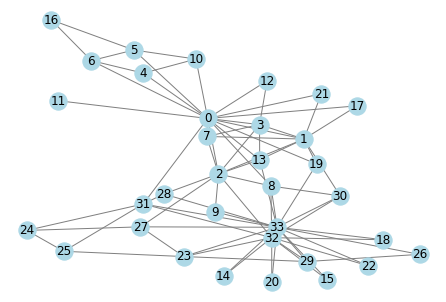

In [974]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.karate_club_graph()
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")
plt.savefig("karate_graph.pdf")

Networkx stores the degrees of nodes in a dictionary where the keys are node IDs and the values are their associated degrees.

Previously, G.degree() returned a Python dictionary, while now it returns a DegreeView object, which is similar to a dictionary.

You can get access to that dictionary using the G dot degree method.

In [975]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [976]:
G.degree()[33]

17

In [977]:
G.degree(33)

17

In [978]:
G.number_of_nodes()

34

In [979]:
G.number_of_edges()

78

In [980]:
G.degree(0) is G.degree()[0]

True

### Random Graphs

In the same way that we can generate random numbers from a given distribution, like the normal or the binomial distribution, we can sample not numbers but random graphs from a collection or ensemble of random graphs.

Just like different distributions of numbers give rise to different samples of numbers, different random graph models give rise to different kinds of random graphs.

The simplest possible random graph model is the so-called Erdos-Renyi, also known as the ER graph model.

This family of random graphs has two parameters, capital N and lowercase p.

Here the capital N is the number of nodes in the graph, and p is the probability for any pair of nodes to be connected by an edge

Here's one way to think about it-- imagine starting with N nodes and no edges.

You can then go through every possible pair of nodes and with probability p insert an edge between them.

In other words, you're considering each pair of nodes once, independently of any other pair.

You flip a coin to see if they're connected, and then you move on to the next pair.

If the value of p is very small, typical graphs generated from the model tend to be sparse, meaning having few edges.

In contrast, if the value of p is large, typical graphs tend to be densely connected.

Although the NetworkX library includes an Erdos-Renyi graph generator, we'll be writing our own ER function to better understand the model.

This is also an opportunity for us to learn more about the NetworkX library, and it's also a step towards being able to implement a more complicated network model yourself, the kind of model that is not included in the NetworkX library.

Our task is to implement an ER model as a Python function.

Let's first see how to implement the coin flip just one time.

To do this, we'll be using the SciPy stats module, more specifically a function called Bernoulli.

We'll be using the rvs method to generate one single realization in this case of a Bernoulli random variable.

The only input argument is p, which is the probability of success.

In this case, the outcomes are coded as 0s and 1s.

That means that p is the probability that we get an outcome 1 as opposed to outcome 0.

So if we keep repeating this, you'll get mostly 0s, but occasionally you'll get a 1 as well.

In [981]:
from scipy.stats import bernoulli

In [982]:
bernoulli.rvs(p=0.2)

0

In [983]:
bernoulli.rvs(p=0.2)

0

In [984]:
bernoulli.rvs(p=0.2)

0

Let's look at some informal pseudocode code for our ER graph generator.

In [985]:
from scipy.stats import bernoulli

N = 20
p = 0.2

G = nx.Graph()
G.add_nodes_from(range(N))
for node1 in G.nodes():
    for node2 in G.nodes():
        if bernoulli.rvs(p=p):
            G.add_edge(node1, node2)

In [986]:
G.number_of_nodes()

20

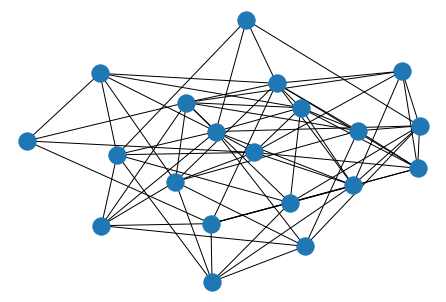

In [987]:
nx.draw(G)

If you're used to looking at networks, this graph will look too densely connected to be right.

In fact, we have a subtle error in our code.

Now we're considering each pair of nodes twice, not just once, as we should.

But because our graph is undirected, we should consider each pair of nodes just one time.

In [988]:
from scipy.stats import bernoulli

N = 20
p = 0.2

G = nx.Graph()
G.add_nodes_from(range(N))
for node1 in G.nodes():
    for node2 in G.nodes():
        if node1 < node2 and bernoulli.rvs(p=p):
            G.add_edge(node1, node2)

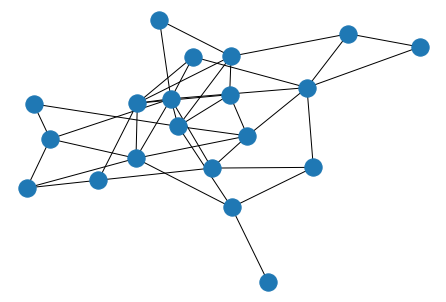

In [989]:
nx.draw(G)

In [990]:
def er_graph(N, p):
    """
    Generate an ER graph
    """
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 < node2 and bernoulli.rvs(p=p):
                G.add_edge(node1, node2)

    return G

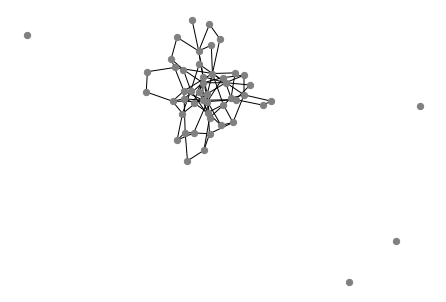

In [991]:
nx.draw(er_graph(50, 0.08), node_size=40, node_color="gray")
plt.savefig("er1.pdf")

How many components do you expect in an Erdős-Rényi graph with n=10 and p=1? 

Ans -> 1
p=1 means an edge exists between each node pair, making the network consist of one component.

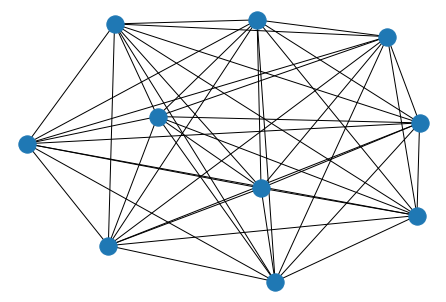

In [992]:
nx.draw(nx.erdos_renyi_graph(n=10, p=1))

How many components do you expect in an Erdős-Rényi graph with n=10 and p=0?

Ans -> 10

p=0 means the network will contain no edges, so each node is also its own component.

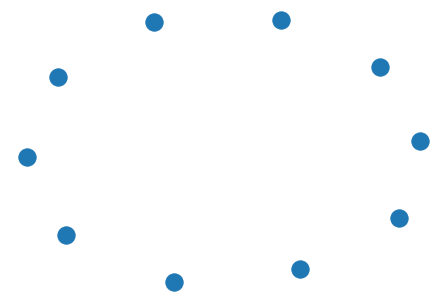

In [993]:
nx.draw(nx.erdos_renyi_graph(n=10, p=0))

### Plotting the Degree Distribution

In [994]:
def plot_degree_distribution(G):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    # plt.axvline(x.mean(), linestyle='dashed', linewidth=1)
    plt.xlabel("Degree $k$")
    plt.ylabel("$P(k)$")
    plt.title("Degree Distribution")

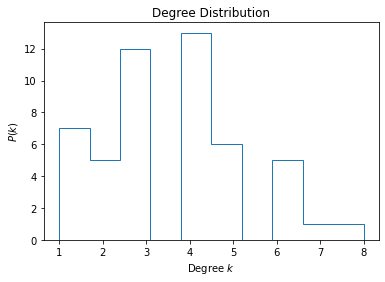

In [995]:
G = er_graph(50, 0.08)
plot_degree_distribution(G)
plt.savefig("hist1.pdf")

Looking at the histogram, we'll see that there are some notes that have zero degree, so they have no connections.

And the most connected node has 10 connections.

A majority of the nodes appear to have somewhere between perhaps 4 and 7 edges, although the result is not that clear.

The reason for that is that our graph is relatively small.

We can create a clearer plot or a cleaner plot by increasing the number of nodes in our graph.

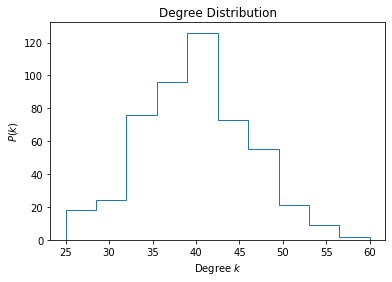

In [996]:
G = er_graph(500, 0.08)
plot_degree_distribution(G)
plt.savefig("hist1.pdf")

So most of the nodes have a higher degree than before.

That's because previously each node had 50 minus 1, or 49 potential nodes that they could connect to.

In this case we, have 500 nodes, so any node can connect to any of the remaining 500 minus 1 nodes.

So in this case, we would expect the degree, the average degree, to be higher than previously.

If you look at the histogram again, we will see that there are no nodes that have fewer than 25 connections and also there are no nodes that have more than 63 or 64 connections.

The majority of the nodes appear to have somewhere between perhaps 35 and 50 connections.

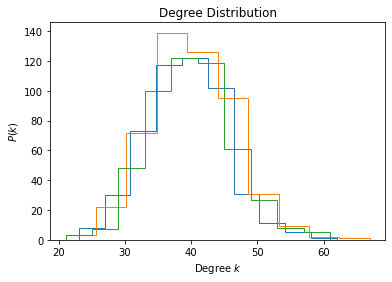

In [997]:
G1 = er_graph(500, 0.08)
plot_degree_distribution(G1)
G2 = er_graph(500, 0.08)
plot_degree_distribution(G2)
G3 = er_graph(500, 0.08)
plot_degree_distribution(G3)
plt.savefig("hist_3.pdf")

In this case, we have three plots, three histograms, because we have three different graphs.

Because every graph realization will be different from any other, that means that the specific degree distribution of any graph is going to be somewhat different from that of any other graph.

In this case, we can see that the three degree distributions follow one another fairly closely.

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

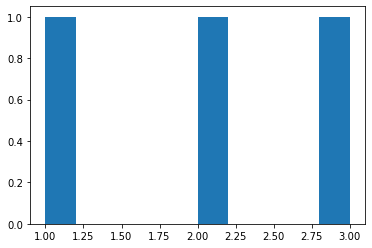

In [998]:
D = {1:1, 2:2, 3:3}
plt.hist(D)

How do the degree distributions in nx.erdos_renyi_graph(100, 0.03) and nx.erdos_renyi_graph(100, 0.30) compare?

Ans -> The latter distribution has a greater mean on average.

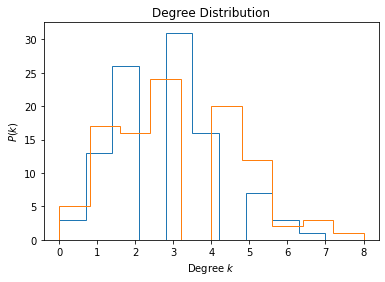

In [999]:
plot_degree_distribution(nx.erdos_renyi_graph(100, 0.03))
plot_degree_distribution(nx.erdos_renyi_graph(100, 0.03))

Average degree: 2.72
Average degree: 2.62


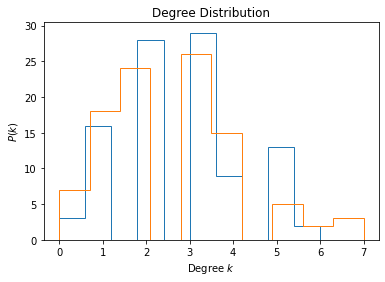

In [1000]:
G1 = nx.erdos_renyi_graph(100, 0.03)
degree_sequence = [d for n, d in G1.degree()]
print(f"Average degree: {np.mean(degree_sequence)}")
G2 = nx.erdos_renyi_graph(100, 0.03)
degree_sequence = [d for n, d in G2.degree()]
print(f"Average degree: {np.mean(degree_sequence)}")
plot_degree_distribution(G1)
plot_degree_distribution(G2)

### Descriptive Statistics of Empirical Social Networks

In this task, we will look at basic properties of the social networks from two different villages in rural India.

These data are part of a much larger dataset that was collected to study diffusion of micro-finance.

And the findings of this study were published in an article called, "The Diffusion of Micro-finance," in the Journal Science in 2013.

In short, a census of households was conducted, and a subset of individuals was asked detailed questions about the relationships they have with others in the village.

This information was used to create networks for each village.

Basic information for all households and all surveyed individuals was also collected.

The structure of connections in a network can be captured in what is known as the Adjacency matrix of the network.

If we have n nodes, this is n by n matrix, where entry ij is one if node i and node j have a tie between them.

Otherwise, that entry is equal to zero.

The graphs we're dealing with are called undirected, which means that a tie between nodes i and j can just as well be described as a tie between nodes j and i.

Consequently, the adjacency matrix is symmetric.

That means that the element ij is always the same as the element ji.

Either both are zero or both are equal to 1.

We provide the adjacency matrix files for the two villages as CSV files.

We will first read in the network of adjacency matrices and construct the networks.

Here, np.loadtxt is used to read in the CSV files, the adjacency matrices.

Village number 1 data can be downloaded here: [adj_allVillageRelationships_vilno_1.csv](https://courses.edx.org/assets/courseware/v1/73e495dede402cd2b4a6087725fdad19/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/adj_allVillageRelationships_vilno_1.csv) External link.

Village number 2 data can be downloaded here: [adj_allVillageRelationships_vilno_2.csv](https://courses.edx.org/assets/courseware/v1/e39da5bc543c636c1c4c8bd376fb8c44/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/adj_allVillageRelationships_vilno_2.csv) External link.

The data described in this video are from [Banerjee et al. 2013: The Diffusion of Microfinance](http://science.sciencemag.org/content/341/6144/1236498.full) External link.

Our next step will be to convert the adjacency matrices to graph objects.

We will accomplish that by using the to NetworkX graph method.

To get a basic sense of the network size and number of connections, let's count the number of nodes and the number of edges in the networks.

In addition, each node has a total number of edges, its degree.

Let's also calculate the mean degree for all nodes in the network.

Let's import the degree distribution from these two villages.

In [1001]:
def basic_net_stats(G):
    print(f"Number of Nodes: {G.number_of_nodes()}")
    print(f"Number of Edges: {G.number_of_edges()}")
    print(f"Average degree: {np.round(np.mean([d for n,d in G.degree()]), 2)}")

Number of Nodes: 843
Number of Edges: 3405
Average degree: 8.08

Number of Nodes: 877
Number of Edges: 3063
Average degree: 6.99


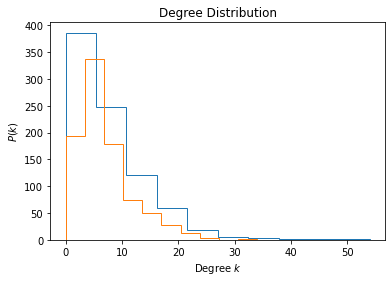

In [1002]:
import numpy as np 
import networkx as nx

A1 = np.loadtxt("adj_allVillageRelationships_vilno_1.csv", delimiter=",")
A2 = np.loadtxt("adj_allVillageRelationships_vilno_2.csv", delimiter=",")

G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

basic_net_stats(G1)
print()
basic_net_stats(G2)

plot_degree_distribution(G1)
plot_degree_distribution(G2)
plt.savefig("village_hist.pdf")

Notice how the degree distributions look quite different from what we observed for the ER networks.

It seems that most people have relatively few connections, whereas a small fraction of people have a large number of connections.

This distribution doesn't look at all symmetric, and its tail extends quite far to the right.

This suggests that the ER graphs are likely not good models for real world social networks.

In practice, we can use ER graphs as a kind of reference graph by comparing their properties to those of empirical social networks.

More sophisticated network models are able to capture many of the properties that are shown by real world networks.

But we will not go into those details here.

### Finding the Largest Connected Component

In most networks, most nodes are connected to each other as part of a single connected component.

We can extract all components for graph using the following function in the NetworkX module.

This function is called connected components subgraph

In this case, Python tells us that this is what's called a generator function.

Generator functions do not return a single object but instead, they can be used to generate a sequence of objects using the next method.

In [1003]:
import numpy as np 
import networkx as nx

A1 = np.loadtxt("adj_allVillageRelationships_vilno_1.csv", delimiter=",")
A2 = np.loadtxt("adj_allVillageRelationships_vilno_2.csv", delimiter=",")

G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

In [1004]:
# nx. connected_component_subgraphs(G1) # This is deprecated hence use below alternative

gen = (G1.subgraph(c) for c in nx.connected_components(G1))
type(gen)

generator

We can first create a generator.

Let's call that gen. So gen equals and nx.connected subgraphs.

To get to an actual component, we can use the next method.

The actual name of the method is underscore underscore next underscore underscore.

And we need the parentheses.

This generates a component that we're going to call g.

In [1005]:
g = gen.__next__()
type(g)

networkx.classes.graph.Graph

That means we can ask, what is the number of nodes in this component?

And this particular component has 825 nodes.

Another way to do this is to use the len function.

So we can take len off gen dot underscore underscore next, and so on.

And what Python is telling us is that the next subsequent component has three nodes in it.

And we could, in principle, run these a few times until we run out of components.

In [1006]:
g.number_of_nodes()

825

In [1007]:
len(gen.__next__())

3

In [1008]:
len(gen.__next__())

3

In [1009]:
len(gen.__next__())

4

Let's take another moment to look at the code.

The first thing to realize here is that len when apply to a graph object returns to the number of nodes in that object.

Let's try saying len of G1, and Python is returning 843.

We can also do G1 number of nodes, and the answer is the same.

In [1010]:
len(G1)

843

In [1011]:
G1.number_of_nodes()

843

When we're running the line length of generator next, Python is going over the graph one component at a time.

So for example, in this case, we might have five components or as many as 25 components in our graphs.

Each of these components has some size associated with it, which again is the number of nodes that make up that given component.

When we run this line, Python is telling us that there is a component in that graph that has size 2.

In other words, there is a component that consists of only two nodes. 

We can keep running this and until eventually we'll have run out of components.

One thing to realize about this is that the ordering of these components is arbitrary.

In [1012]:
len(gen.__next__())

2

In [1013]:
len(gen.__next__())

4

In [1014]:
len(gen.__next__())

1

In [1015]:
len(gen.__next__())

1

A good way to proceed is to use the max function that we can use to get the maximum of a sequence.

The max function can take in a generator as its input.

we need to tell the max function what number to associate with each object in the sequence, in this case, a graph.

The size of a component is defined as the number of nodes it contains, which as we saw above, we can obtain by applying the len function to a given component.

In [1016]:
import numpy as np 
import networkx as nx

A1 = np.loadtxt("adj_allVillageRelationships_vilno_1.csv", delimiter=",")
A2 = np.loadtxt("adj_allVillageRelationships_vilno_2.csv", delimiter=",")

G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

gen = (G1.subgraph(c) for c in nx.connected_components(G1))

G1_LCC = max((G1.subgraph(c) for c in nx.connected_components(G1)), key=len)
G2_LCC = max((G1.subgraph(c) for c in nx.connected_components(G2)), key=len)

In [1017]:
len(G1_LCC)

825

In [1018]:
G1_LCC.number_of_nodes()

825

In [1019]:
len(G2_LCC)

808

In [1020]:
G2_LCC.number_of_nodes()

808

Let's compute the proportion of nodes that lie in the largest connected components for these two graphs.

This is the number of nodes in the largest connected component.

We can divide that by the number of nodes in the graph itself.

In [1021]:
G1_LCC.number_of_nodes()/ G1.number_of_nodes()

0.9786476868327402

In [1022]:
G2_LCC.number_of_nodes()/ G2.number_of_nodes()

0.9213226909920182

In practice, it is very common for networks to contain one component that encompasses a large majority of its nodes, 95,99, or even 99.9% of all of the nodes.

Let's now try visualizing these components.

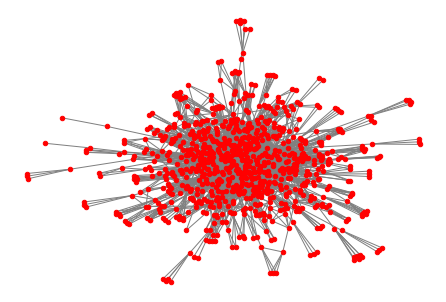

In [1023]:
plt.figure()
nx.draw(G1_LCC, node_color="red", edge_color="gray", node_size=20)
plt.savefig("village1.pdf")

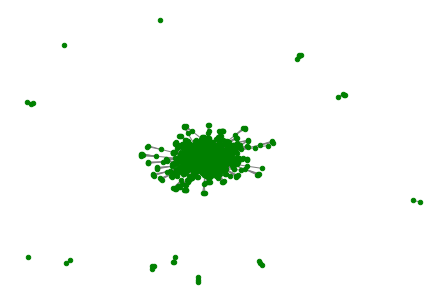

In [1024]:
plt.figure()
nx.draw(G2_LCC, node_color="green", edge_color="gray", node_size=20)
plt.savefig("village2.pdf")

The visualization algorithm that we have used is stochastic, meaning that if you run it several times, you will always get a somewhat different graph layout.

However, in most visualizations, you should find that the largest connected component of G2 appears to consist of two separate groups.

These groups are called network communities.

And the idea is that a community is a group of nodes that are densely connected to other nodes in the group, but only sparsely connected nodes outside of that group.

Finding network communities is a very interesting and timely problem.

It's also one of those problems that is fairly easy to state in words, but a more mathematically rigorous formulation of the problem reveals that a problem is not so easy after all.


For an iterator object X, what does X.__next__() do?

Ans-> Returns the next value in X, if it exists

For a given network G, what does len(G) return?

Ans -> The number of nodes